<a href="https://colab.research.google.com/github/Tencza/Mustang-Hashtags-popularity-analyse/blob/main/Mustang_Hashtags_popularity_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/amueller/word_cloud.git
!ls word_cloud
!pip install wordcloud
!pip install pyLDAvis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import gensim
from gensim import corpora
from gensim.utils import tokenize
import pyLDAvis.gensim_models
import re

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


#Dataset

In [3]:
#Read Data scrapped from IG

df = pd.read_csv('mustang1967.csv')
df

,url,searched_hashtag,location_name,location_id,user_name,user_id,taken_at,comment_count,like_count,text,hashtags,commenters,number_of_posts
0,https://www.instagram.com/p/ChsQ26QMALD,mustang1967,NaN,NaN,jamesbaron,236540373,1661450122,0,7,#lego#creatorexpert#ford#mustang1967 🐎🇺🇸,['#lego#creatorexpert#ford#mustang1967'],[],7812
1,https://www.instagram.com/p/Chppd0nrjZM,mustang1967,Mérida Yucatán,8.422599e+14,cocheradeldragon,18620499064,1661362360,2,29,⚠️🅿️REVENT🅰️⚠️\n 🔥 🔥 🔥 🔥 🔥\n\nGreenlight 1:18 ...,"['#merida', '#yucatan', '#mexico🇲🇽', '#cochera...","[{'username': 'bolilloux', 'text': 'Cual es el...",7812
2,https://www.instagram.com/p/ChocicFORy6,mustang1967,NaN,NaN,ivanziral,6714442877,1661322028,5,31,Ssshhhhheeennnn the beast is almost ready. #m...,"['#mustang', '#musclecar', '#mustang1967', '#c...","[{'username': 'novaisabeast', 'text': 'So when...",7812
3,https://www.instagram.com/p/ChnQwZDIiQK,mustang1967,Überall Auf Der Welt,1.135513e+15,helenas_art_x,9526758427,1661282296,3,56,#polishgirl#germany#photography#everydayeveryw...,['#polishgirl#germany#photography#everydayever...,"[{'username': 'alpha.pkk20', 'text': 'DM it on...",7812
4,https://www.instagram.com/p/ChmRU0GO6Bp,mustang1967,NaN,NaN,classiccarbuyer.co.uk,7556114396,1661249043,1,90,It's #TaillightTuesday 🔦 \n\n@oldngreen67\n.\n...,"['#TaillightTuesday', '#vintagemustangs', '#cl...","[{'username': 'shree.mb11', 'text': 'Send Pic ...",7812
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://www.instagram.com/p/ChR9dj7P51u,mustang1967,"Osaka, Japan",7.730606e+08,kstyle5963,3721237459,1660567538,1,30,WORK💐\n.\n.\n.\n.\n.\n.\n.\n\n#team_shikoku \n...,"['#team_shikoku', '#大阪', '#igmasters', '#ig_wo...","[{'username': 'nature_._._.01', 'text': 'Dm on...",7812
996,https://www.instagram.com/p/ChRqxMcLKVF,mustang1967,Kaáli Autó-Motor Múzeum,1.005402e+14,car_spotting_around_the_wrld,54004582996,1660557737,1,11,Ford Mustang🇺🇸\n\n#ford #fordmustang #fordmust...,"['#ford', '#fordmustang', '#fordmustangs', '#m...","[{'username': 'shutout_done2', 'text': 'Send p...",7812
997,https://www.instagram.com/p/ChPy0PpIQyL,mustang1967,"Hamburg, Germany",2.131102e+08,jannkarrasch,36265185,1660494847,0,38,Classic American interieur 📸\n(1967 Ford Musta...,"['#ford', '#mustang', '#fordmustang', '#mustan...",[],7812
998,https://www.instagram.com/p/ChPdpazATPQ,mustang1967,Yonge-Dundas Square,4.229236e+08,relto96,18252673645,1660483749,12,90,"Bright lights, big city.\n#torontonightlife #m...","['#torontonightlife', '#mustang1967', '#mallus...","[{'username': 'relto96', 'text': '@milo_the_be...",7812


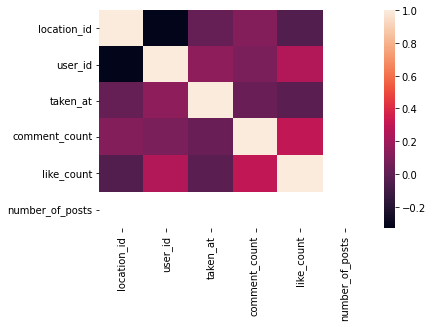

In [4]:
#Visualization

corr = df.corr()
sns.heatmap(corr)

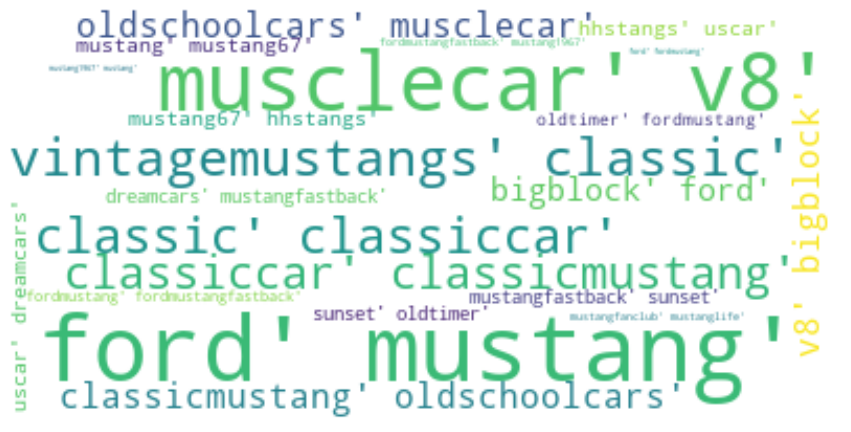

In [5]:
#Word Cloud

# Start with join all hashes:
text = " ".join(hashtag for hashtag in df.hashtags)
#print ("There are {} hashtags in the combination of all posts.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update([])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 519.5, 320.5, -0.5)

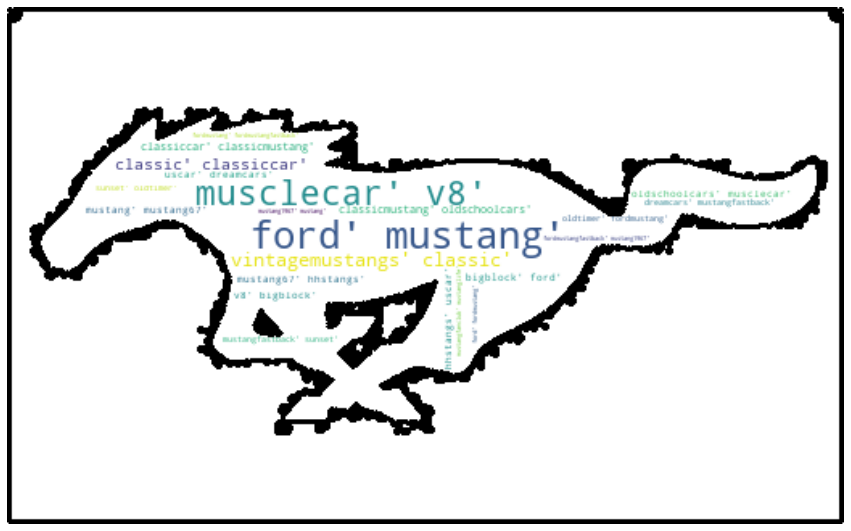

In [6]:
#Mustang logo word cloud

#Load PNG as a Mustang Logo
mustang_mask = np.array(Image.open("mustang_logo.png"))

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=mustang_mask, 
               stopwords=stopwords, contour_width=3, contour_color='black') 

# Generate a wordcloud
wc.generate(text)

# store to file
#wc.to_file("img/mustang.png")

# show # create coloring from image
image_colors = ImageColorGenerator(mustang_mask)
plt.figure(figsize=[15,15])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [7]:
#Data Splitting and Scaling

hash_likes = df[['hashtags','like_count']]

X = hash_likes['hashtags'].str.extract(r'\[(.*)\]')
y = hash_likes['like_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train=X_train[0].map(str)
X_test=X_test[0].map(str)

print("\nBefore transform.........................................\n")
print("The shape of X_train{}".format(X_train.shape))
print("The shape of X_test{}".format(X_test.shape))
print("The shape of y_train{}".format(y_train.shape))
print("The shape of y_test{}".format(y_test.shape))

#TF-IDF

tfidf = TfidfVectorizer()
tfidf.fit(X_train)
X_train_tf = tfidf.transform(X_train)
X_test_tf = tfidf.transform(X_test)

print("\nAfter transform..........................................\n")
print("The shape of transformed X_train{}".format(X_train_tf.shape))
print("The shape of transformed X_test{}".format(X_test_tf.shape))



Before transform.........................................

The shape of X_train(700,)
The shape of X_test(300,)
The shape of y_train(700,)
The shape of y_test(300,)

After transform..........................................

The shape of transformed X_train(700, 238)
The shape of transformed X_test(300, 238)


#Models

In [8]:
#Linear Regression Model 

regressor = LinearRegression()
regressor.fit(X_train_tf.toarray(), y_train)
train_score_lr = regressor.score(X_train_tf.toarray(), y_train)
test_score_lr = regressor.score(X_test_tf.toarray(), y_test)
lr_pred  =  regressor.predict(X_test_tf.toarray())

print("\nLinear Model............................................\n")
print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))
print("The r2 score for lr model is {}".format(r2_score(lr_pred, y_test)))

#Lasso Regression model L1

lasso = Lasso(alpha = 0.25, tol = 0.0925)
lasso.fit(X_train_tf.toarray(), y_train)
train_score_ls = lasso.score(X_train_tf.toarray(), y_train)
test_score_ls = lasso.score(X_test_tf.toarray(),y_test)
lasso_pred = lasso.predict(X_test_tf.toarray())

print("\nLasso Model............................................\n")
print("The train score for lasso model is {}".format(train_score_ls))
print("The test score for lasso model is {}".format(test_score_ls))
print("The r2 score for lasso model is {}".format(r2_score(lasso_pred, y_test)))

#Ridge Regression Model L2

ridgeReg = Ridge(alpha = 0.25)
ridgeReg.fit(X_train_tf.toarray(), y_train)
train_score_ridge = ridgeReg.score(X_train_tf.toarray(), y_train)
test_score_ridge = ridgeReg.score(X_test_tf.toarray(), y_test)
ridge_pred = ridgeReg.predict(X_test_tf.toarray())

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))
print("The r2 score for ridge model is {}".format(r2_score(ridge_pred, y_test)))


Linear Model............................................

The train score for lr model is 0.631912044359547
The test score for lr model is 0.5762362819657629
The r2 score for lr model is 0.29365380181667944

Lasso Model............................................

The train score for lasso model is 0.6538769768286369
The test score for lasso model is 0.5832508036494801
The r2 score for lasso model is 0.3754038046959203

Ridge Model............................................

The train score for ridge model is 0.6521321562382106
The test score for ridge model is 0.584272336527212
The r2 score for ridge model is 0.3439241716719219


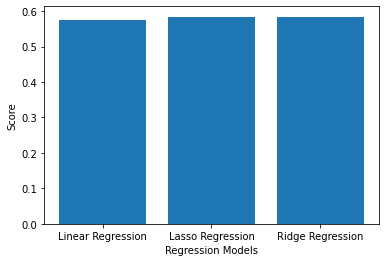

In [9]:
# Plotting the scores

fig, ax = plt.subplots()
plt.bar(['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
        [regressor.score(X_test_tf.toarray(), y_test),
         lasso.score(X_test_tf.toarray(),y_test),
         ridgeReg.score(X_test_tf.toarray(), y_test)])
plt.xlabel('Regression Models')
plt.ylabel('Score')
plt.show()

#Cross Validation

In [10]:
#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train_tf.toarray(), y_train)
lasso_cv_pred = lasso_cv.predict(X_test_tf.toarray())

#score
print("\nLassoCV Model............................................\n")
print("The train score for LassoCV model is {}".format(lasso_cv.score(X_train_tf.toarray(), y_train)))
print("The test score for LassoCV model is {}".format(lasso_cv.score(X_test_tf.toarray(), y_test)))
print("The r2 score for LassoCV model is {}".format(r2_score(lasso_cv_pred, y_test)))

#Ridge Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train_tf.toarray(), y_train)
ridge_cv_pred = ridge_cv.predict(X_test_tf.toarray())

#score
print("\nRidgeCV Model............................................\n")
print("The train score for RidgeCV model is {}".format(ridge_cv.score(X_train_tf.toarray(), y_train)))
print("The test score for RidgeCV model is {}".format(ridge_cv.score(X_test_tf.toarray(), y_test)))
print("The r2 score for RidgeCV model is {}".format(r2_score(ridge_cv_pred, y_test)))


LassoCV Model............................................

The train score for LassoCV model is 0.6539782270525549
The test score for LassoCV model is 0.5829178490651721
The r2 score for LassoCV model is 0.3800594285821908

RidgeCV Model............................................

The train score for RidgeCV model is 0.6539877756912132
The test score for RidgeCV model is 0.5829009526394469
The r2 score for RidgeCV model is 0.3804753182642707


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191294.4732774496, tolerance: 153462.88389982146
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190620.56715035439, tolerance: 153462.88389982146
  positive,


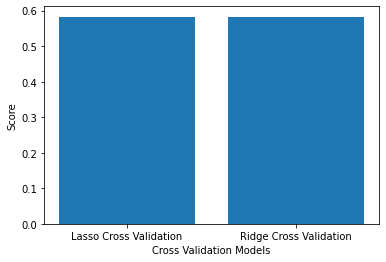

In [11]:
# Plotting the scores

fig, ax = plt.subplots()
plt.bar(['Lasso Cross Validation', 'Ridge Cross Validation'],
        [lasso_cv.score(X_test_tf.toarray(), y_test), 
         ridge_cv.score(X_test_tf.toarray(), y_test)])
plt.xlabel('Cross Validation Models')
plt.ylabel('Score')
plt.show()

#Input hashtags to predict likes

In [13]:
hash = []
n = int(input("Enter number of hashtags u wanna put in (up to 10 hashtags):"))

for i in range(0, n):
    ele = str(input())
  
    hash.append(ele)

input_test = ' '.join(hash)
input_test_tf = tfidf.transform([input_test])


#Linear Model Predict
lr_pred = regressor.predict(input_test_tf.toarray())

#score
print("\nLinear Model............................................\n")
print("For lr model predicted likes are {}".format(lr_pred))

#Lasso Model Predict
lasso_pred = lasso.predict(input_test_tf.toarray())

#score
print("\nLasso Model............................................\n")
print("For Lasso model predicted likes are {}".format(lasso_pred))

#Ridge Model Predict
ridge_pred = ridgeReg.predict(input_test_tf.toarray())

#score
print("\nRidge Model............................................\n")
print("For Ridge model predicted likes are {}".format(ridge_pred))

#Lasso Cross validation
lasso_cv_pred = lasso_cv.predict(input_test_tf.toarray())

#score
print("\nLassoCV Model............................................\n")
print("For LassoCV model predicted likes are {}".format(lasso_cv_pred))

#Ridge Cross validation
ridge_cv_pred = ridge_cv.predict(input_test_tf.toarray())

#score
print("\nRidgeCV Model............................................\n")
print("For RidgeCV model predicted likes are {}".format(ridge_cv_pred))

Enter number of hashtags u wanna put in (up to 10 hashtags):4
#cars
#mercedes
#bmw
#ford

Linear Model............................................

For lr model predicted likes are [-1.13870196e+17]

Lasso Model............................................

For Lasso model predicted likes are [265.22375794]

Ridge Model............................................

For Ridge model predicted likes are [167.4807917]

LassoCV Model............................................

For LassoCV model predicted likes are [41.28350695]

RidgeCV Model............................................

For RidgeCV model predicted likes are [166.25337956]


#Topic modeling

In [ ]:
#Plot most common tags
hashes = df['hashtags']
hash_list = [item for sublist in hashes for item in sublist]

hash_freq = pd.Series(hash_list).value_counts()

hash_freq[:10].plot(kind='barh')
plt.tight_layout()

#Generate dictionary and corpus
descriptions = [list(tokenize(t)) for t in df['hashtags']]

dictionary = corpora.Dictionary(descriptions)
corpus = [dictionary.doc2bow(text) for text in descriptions]

#Generate topics
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50)

#Print weights for topics
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

#Generate HTML visualization
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary, sort_topics=True)
pyLDAvis.save_html(lda_display, 'mustang_topics.html')

#Model for main_tag classification

##Dataset - read and visualization

In [12]:
#Read dataset

df2 = pd.read_csv('camaro1969.csv', index_col=0)
df2.sample(10)

,url,searched_hashtag,location_name,location_id,user_name,user_id,taken_at,comment_count,like_count,text,hashtags,commenters,number_of_posts
469,https://www.instagram.com/p/ChSn_u1tZ7u,camaro1969,"Casablanca, Morocco",2.176315e+08,bilalzh_,51645417138,1660589838,0,20,🖇🇫🇷🤤\nC'est une vie #jungkook #camaro1969 #xxx...,"['#jungkook', '#camaro1969', '#xxxtentacion🔥',...",[],2606
242,https://www.instagram.com/p/CgfIA9-oDK6,camaro1969,NaN,NaN,_bata_shonko_,541132102,1658861795,3,21,#camaro #camaro1969 #chevrolet #impala #impala...,"['#camaro', '#camaro1969', '#chevrolet', '#imp...","[{'username': 'match.wheels', 'text': '😍😍😮nice...",2606
264,https://www.instagram.com/p/CgsQmyJJF5p,camaro1969,NaN,NaN,mcarthurmotor,22223173773,1659302506,0,29,62k for the 1969 #camaro1969 #camaro #murray #...,"['#camaro1969', '#camaro', '#murray', '#pedalc...",[],2606
499,https://www.instagram.com/p/ChNLruPLdG8,camaro1969,"Wadsworth, Ohio",2.359606e+08,dz302_69_camaro,54451426634,1660407222,3,29,Wadsworth Eagles car show. 8/13/22\n\n#camaro ...,"['#camaro', '#camaroworldwide', '#camarolove',...","[{'username': 'clown_6108', 'text': 'Dm it ♥️ ...",2606
511,https://www.instagram.com/p/Cghcx2Ir1ZG,camaro1969,NaN,NaN,forzadocs,34966070686,1658939790,5,61,Chevrolet Camaro Super Sport Coupe 1969\n.\n.\...,"['#forza4photography', '#fh5photomode', '#fh5p...","[{'username': 'forzadocs', 'text': '@pnj.o0 🔥🔥...",2606
74,https://www.instagram.com/p/Cgt3aAZKjA9,camaro1969,Saturday Night Cruise,1.013006e+09,dutch.autofocuz,50242392230,1659356403,4,54,1969 Chevrolet USA Camaro 🔥🔥🔥\n\n_____________...,['#chevrolet#chevroletcamaro#camaro1969#1969#1...,"[{'username': 'angelina._.04_', 'text': 'Send ...",2606
494,https://www.instagram.com/p/ChYACEuuwTO,camaro1969,Zoar Historic District,3.307483e+08,dz302_69_camaro,54451426634,1660770212,1,61,Zoar Cruise In 7/31/22\n\n#camaro #camaroz28 #...,"['#camaro', '#camaroz28', '#camarozone', '#196...","[{'username': 'belivejavb20', 'text': 'DM it o...",2606
143,https://www.instagram.com/p/ChYACEuuwTO,camaro1969,Zoar Historic District,3.307483e+08,dz302_69_camaro,54451426634,1660770212,1,61,Zoar Cruise In 7/31/22\n\n#camaro #camaroz28 #...,"['#camaro', '#camaroz28', '#camarozone', '#196...","[{'username': 'belivejavb20', 'text': 'DM it o...",2606
192,https://www.instagram.com/p/ChxA5wWKmDA,camaro1969,NaN,NaN,car.box_,45818072383,1661609529,4,244,Chevrolet Camaro jest z nami już od ponad pięć...,"['#camaro', '#zl1', '#1969zl1', '#camarozl1', ...","[{'username': 'kamilllsski', 'text': 'Niedawno...",2606
330,https://www.instagram.com/p/ChqAvKtvI3C,camaro1969,NaN,NaN,drusvalier,1020443384,1661374561,7,1015,Reposted from @and4224 Cloudy day in the city ...,"['#chevrolet', '#camaro', '#chevroletcamaro', ...","[{'username': 'camaro.1976', 'text': 'Awsome p...",2606


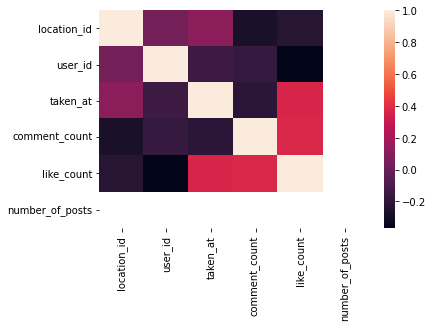

In [13]:
#Visualization

corr2 = df2.corr()
sns.heatmap(corr2)

In [14]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

(-0.5, 559.5, 165.5, -0.5)

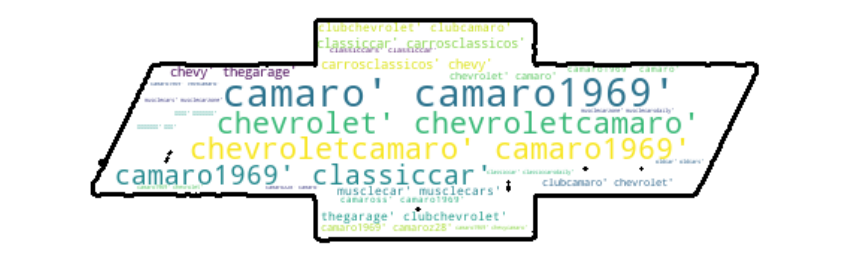

In [16]:
#Word Cloud

# Start with join all hashes:
text2 = " ".join(hashtag for hashtag in df2.hashtags)
#print ("There are {} hashtags in the combination of all posts.".format(len(text)))

# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update([])

#Load PNG as a Chevrolet Logo
chevrolet_mask2 = np.array(Image.open("chevrolet-logo2.png"))

# Transform your mask into a new one that will work with the function:
transformed_chevrolet_mask2 = np.ndarray((chevrolet_mask2.shape[0],chevrolet_mask2.shape[1]), np.int32)

for i in range(len(chevrolet_mask2)):
    transformed_chevrolet_mask2[i] = list(map(transform_format, chevrolet_mask2[i]))

# Check the expected result of your mask
transformed_chevrolet_mask2

# Create a word cloud image
wc2 = WordCloud(background_color="white", max_words=1000, mask=transformed_chevrolet_mask2, 
               stopwords=stopwords, contour_width=3, contour_color='black') 

# Generate a wordcloud
wc2.generate(text2)

# store to file
#wc.to_file("img/chevrolet.png")

# show # create coloring from image
image_colors = ImageColorGenerator(transformed_chevrolet_mask2)
plt.figure(figsize=[15,15])
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")

##Data preparing

In [19]:
#Connect both datasets
df_concated = df[['hashtags', 'searched_hashtag']].append(df2[['hashtags', 'searched_hashtag']])

#Set both searched hashtags and drop them from dataset
tag1 = '#mustang1967'
tag2 = '#camaro1969'
X = [' '.join(re.findall(r'(#.*?)\'',x)) for x in df_concated['hashtags'] if x not in [tag1, tag2]]


tags = []
for post in df_concated['hashtags']:
    tags.append(' '.join([tag for tag in post if tag not in [tag1, tag2]]))

#Split set to train and data
X_train_car, X_test_car, y_train_car, y_test_car = train_test_split(X, df_concated['searched_hashtag'], test_size=0.3, random_state=0, stratify=df_concated['searched_hashtag'])


##Generate bag of words

In [ ]:
#TF-IDF

tfidf2 = TfidfVectorizer(max_features=100)
X_train_car_tf = tfidf2.fit_transform(X_train_car)
X_test_car_tf = tfidf2.transform(X_test_car)

tfidf2.get_feature_names()

#Build classifier

In [21]:
clf = MultinomialNB()
clf = clf.fit(X_train_car_tf, y_train_car)

#Train/Test score
print("Train score is {}".format(clf.score(X_train_car_tf, y_train_car)))
print("Test score is {}".format(clf.score(X_test_car_tf, y_test_car)))

Train score is 1.0
Test score is 1.0


##Input hashtag

In [22]:
text = str(input('Enter hashtag which you want to classify between Mustang or Camaro:\n'))
X_usr = tfidf2.transform([text])
clf.predict(X_usr)
print(f"Your hashtag {text} is classify to {clf.predict(X_usr)}")

Enter hashtag which you want to classify between Mustang or Camaro:
#supercar
Your hashtag #supercar is classify to ['camaro1969']
